#  Deep Learning Algoritmaları ile Fotoğraflardaki Nesneleri Tanıma ve Sınıflandırma Projesi

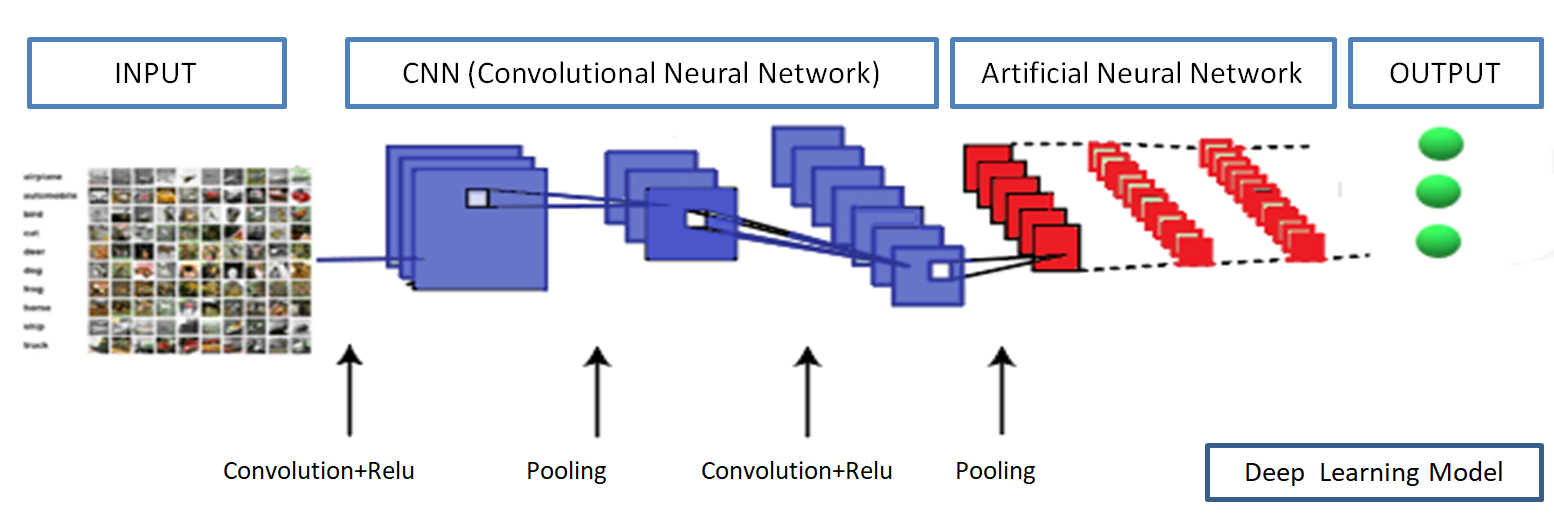


## Datasetimizi (cifar10 verisetini) yüklüyoruz ve Kütüphaneleri Import Ediyoruz

In [1]:
!pip install keras

In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


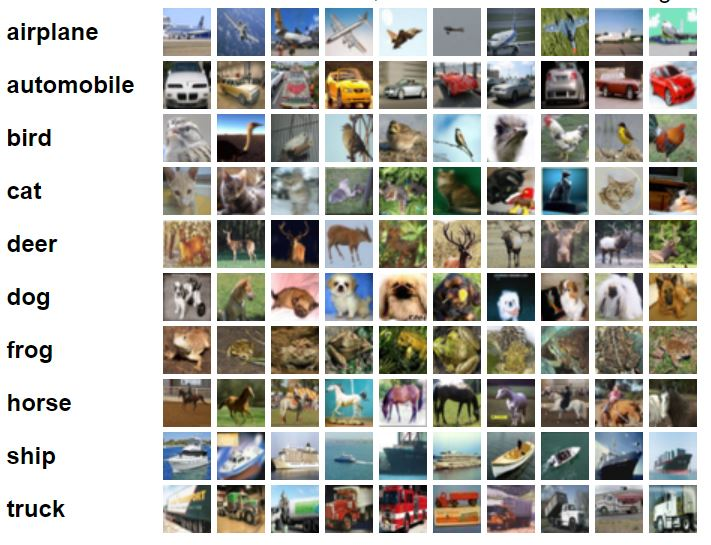

Her bir fotoğraf 32 pixele-32 pixel kare boyutunda ve renkli 3 kanal RGB bilgileri olduğu için arrayımız bu şekilde

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

y_train ve y_test 2 boyutlu bir array olarak tutuluyor cifar10 verisetinde.
Biz bu verileri görsel olarak daha rahat anlamak için tek boyutlu hale getiriyoruz.
2 boyutlu bir arrayi (sadece tek bir boyutunda veri var diğer boyutu boş olan tabi) tek boyutlu hale getirmek için reshape() kullanıyoruz.

In [9]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

# Verileri Görmek

In [10]:
resim_siniflari = ["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(resim_siniflari[y[index]])

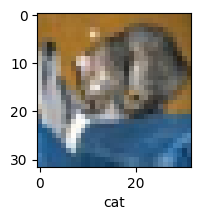

In [12]:
plot_sample(X_test,y_test,0)

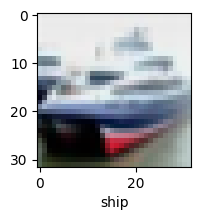

In [13]:
plot_sample(X_test,y_test,1)

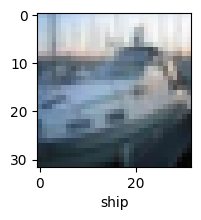

In [14]:
plot_sample(X_test,y_test,2)

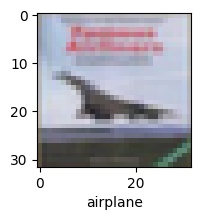

In [15]:
plot_sample(X_test,y_test,3)

Verilerimizi normalize etmemiz gerekiyor. Aksi takdirde CNN algoritmaları yanlış sonuç verebiliyor. Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için normalization için basitçe her bir pixel değerini 255'e bölmemiz yeterli

In [17]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

## Deep Learning Algoritmamızı CNN - Convolutional Neural Network Kullanarak Tasarlıyoruz

In [19]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution Layer. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikler çıkarıyoruz
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    # İkinci bölüm klasik ANN olan layerımız. Yukardaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz.
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(10,activation="softmax")
])

In [20]:
deep_learning_model.compile(optimizer="adam",
                            loss="sparse_categorical_crossentropy",
                            metrics=["accuracy"])

## Modelimizi eğitmeye başlayalım

In [23]:
deep_learning_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6151 - accuracy: 0.4202
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5904 - accuracy: 0.4303
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5729 - accuracy: 0.4337
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5588 - accuracy: 0.4413
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5465 - accuracy: 0.4448
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5328 - accuracy: 0.4528
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5153 - accuracy: 0.4585
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5032 - accuracy: 0.4620
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4836 - accuracy: 0.4694
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [24]:
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4742 - accuracy: 0.4690


[1.4742425680160522, 0.4690000116825104]

In [25]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

313/313 [==============================] - 3s 8ms/step


array([[1.0493329e-02, 1.9725248e-02, 1.1769352e-01, 4.2253387e-01,
        5.8252610e-02, 1.6203414e-01, 1.1745916e-01, 1.2262060e-02,
        7.3972121e-02, 5.5739004e-03],
       [7.6810509e-02, 1.7310552e-01, 1.5187446e-03, 8.7695656e-04,
        3.4904919e-04, 4.2173133e-04, 4.3294005e-04, 8.4032734e-05,
        5.8333594e-01, 1.6306469e-01],
       [2.8812038e-02, 2.4539848e-01, 1.5644612e-03, 1.5891175e-03,
        2.6780705e-04, 7.6462445e-04, 1.3528647e-03, 3.9203206e-04,
        4.3645778e-01, 2.8340095e-01]], dtype=float32)

In [27]:
y_prediction_siniflari = [np.argmax(element) for element in y_pred]
y_prediction_siniflari[:3]

[3, 8, 8]

In [28]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

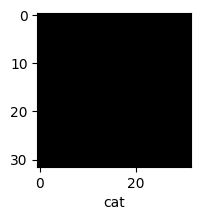

In [29]:
plot_sample(X_test,y_test,0)

In [30]:
resim_siniflari[y_prediction_siniflari[0]]

'cat'

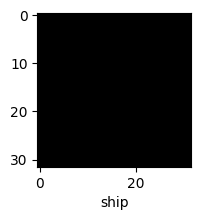

In [31]:
plot_sample(X_test,y_test,1)

In [32]:
resim_siniflari[y_prediction_siniflari[1]]

'ship'

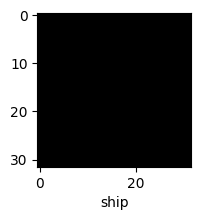

In [33]:
plot_sample(X_test,y_test,2)

In [34]:
resim_siniflari[y_prediction_siniflari[2]]

'ship'